# EDA

## IMPORTAR PAQUETES

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [194]:
ruta_proyecto = 'C:/Users/alvar/Proyectos ML/03_RIESGOS'

Nombres de los ficheros de datos.

In [195]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [196]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [197]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139646 entries, 137387967 to 94394801
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   empleo                139646 non-null  object
 1   antiguedad_empleo     139646 non-null  object
 2   ingresos_verificados  139646 non-null  object
 3   rating                139646 non-null  object
 4   vivienda              139646 non-null  object
 5   descripcion           139646 non-null  object
 6   finalidad             139646 non-null  object
 7   num_cuotas            139646 non-null  object
 8   estado                139646 non-null  object
dtypes: object(9)
memory usage: 10.7+ MB


In [198]:
variables = ['antiguedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [199]:
def frecuencias_cat(df_cat):
    resultado = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [200]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,antiguedad_empleo,9 years,0.035282
8,antiguedad_empleo,8 years,0.040982
7,antiguedad_empleo,7 years,0.041032
6,antiguedad_empleo,6 years,0.044656
4,antiguedad_empleo,4 years,0.061248
5,antiguedad_empleo,5 years,0.063031
11,antiguedad_empleo,Unknown,0.064656
0,antiguedad_empleo,1 year,0.065358
3,antiguedad_empleo,3 years,0.080045
10,antiguedad_empleo,< 1 year,0.084943


### Análisis gráfico

In [201]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

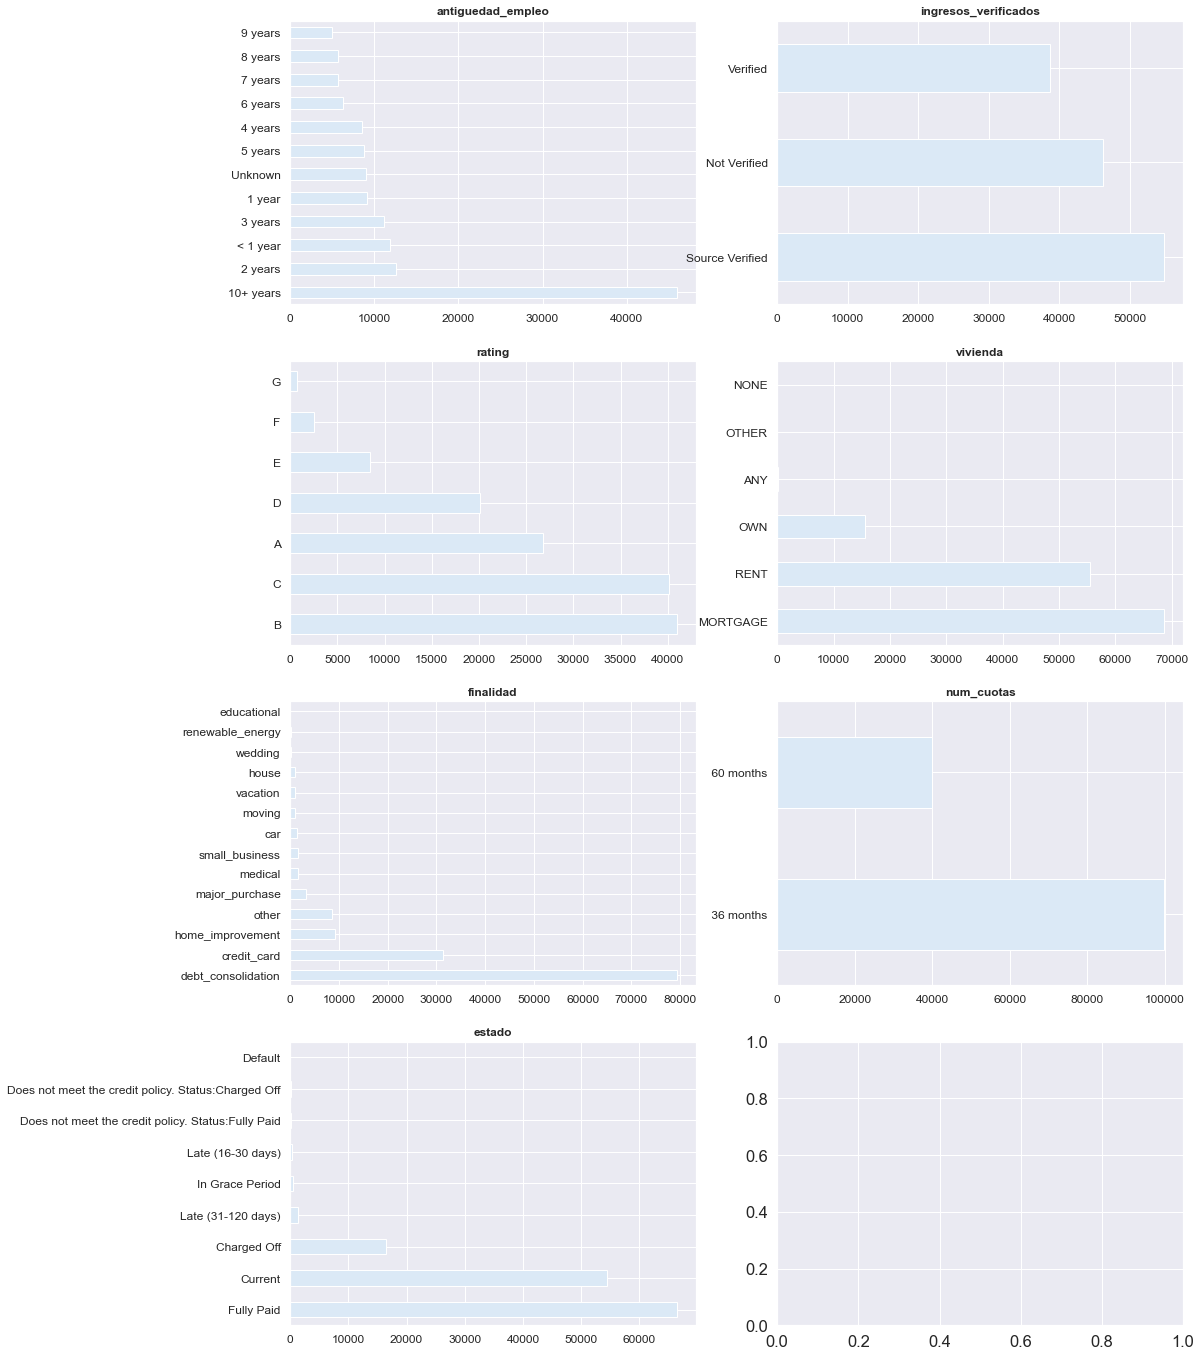

In [202]:
graficos_eda_categoricos(cat[variables])

Conclusiones:

En transformación:

* En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
* En finalidad juntar renewable_energy, educational y wedding en 'otros'
* Crear la target a partir de estado

In [203]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139646 entries, 137387967 to 94394801
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   empleo                139646 non-null  object
 1   antiguedad_empleo     139646 non-null  object
 2   ingresos_verificados  139646 non-null  object
 3   rating                139646 non-null  object
 4   vivienda              139646 non-null  object
 5   descripcion           139646 non-null  object
 6   finalidad             139646 non-null  object
 7   num_cuotas            139646 non-null  object
 8   estado                139646 non-null  object
dtypes: object(9)
memory usage: 10.7+ MB


In [204]:
def agrupar_cat_raras(variable, criterio = 0.005):
    #Calcula las frecuencias
    frecuencias = variable.value_counts(normalize=True)
    #Identifica las que están por debajo del criterio
    temp = [cada for cada in frecuencias.loc[frecuencias < criterio].index.values]
    #Las recodifica en 'OTROS'
    temp2 = np.where(variable.isin(temp),'Unknown',variable)
    #Devuelve el resultado
    return(temp2)

In [205]:
var_imputar_moda = ['empleo']

In [206]:
for variable in var_imputar_moda:
    cat[variable] = agrupar_cat_raras(cat[variable],criterio = 0.005)

In [207]:
cat['empleo'].value_counts()

Unknown             129170
Teacher               2521
Manager               2167
Owner                 1333
Registered Nurse       971
Driver                 934
RN                     928
Supervisor             843
Sales                  779
Name: empleo, dtype: int64

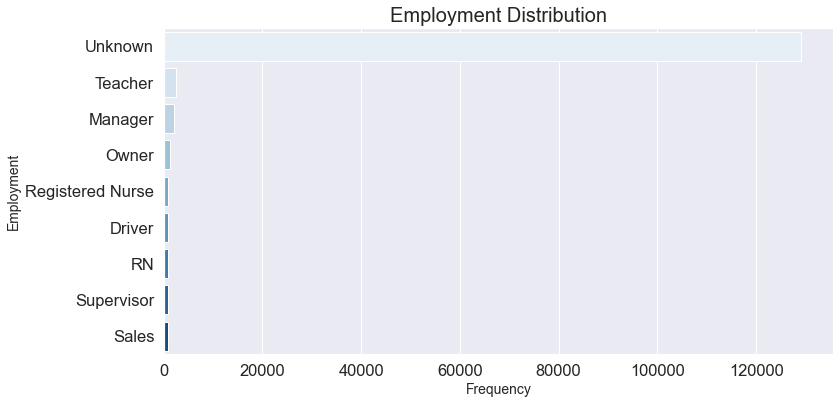

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
ordered_categories = cat['empleo'].value_counts().index

# Gráfico de barras con las categorías ordenadas
sns.countplot(data=cat, y='empleo', order=ordered_categories, palette='Blues')

# Personalizar el gráfico
plt.title("Employment Distribution", fontsize=20)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Employment", fontsize=14)

# Mostrar el gráfico
plt.show()

In [209]:
cat['average_status_grouped'] = cat.groupby('rating')['target_pd'].transform('mean').round(3)*100

KeyError: 'Column not found: target_pd'

In [ ]:
grouped_means

In [ ]:
cat

In [ ]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
order = cat.groupby('rating')['average_status_grouped'].mean().sort_values(ascending=False).index


# Gráfico de barras con las categorías ordenadas
sns.barplot(data=cat,x='rating', y='average_status_grouped', order=order, palette='Blues')

# Personalizar el gráfico
plt.title("Debt status ratio by customer rating", fontsize=20)
plt.xlabel("Customer rating", fontsize=14)
plt.ylabel("Average debt status", fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
df=pd.merge(left=cat, right=num, how='left',on='id_cliente')

In [ ]:
df['discret_credit_card_usage']=pd.cut(df['porc_tarjetas_75p'],[0, 25, 50, 75, 100],labels=['0-25', '25-50', '50-75', '75-100'])

In [ ]:
df['discret_credit_card_usage']=df['discret_credit_card_usage'].fillna('0-25')

In [ ]:
df[['porc_tarjetas_75p','discret_credit_card_usage']]['discret_credit_card_usage'].unique()

In [ ]:
df['average_status_grouped_card'] = df.groupby('discret_credit_card_usage')['target_pd'].transform('mean').round(3)*100

In [ ]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
order = df.groupby('discret_credit_card_usage')['average_status_grouped_card'].mean().sort_values(ascending=False).index


# Gráfico de barras con las categorías ordenadas
sns.barplot(data=df,x='discret_credit_card_usage', y='average_status_grouped_card', order=order, palette='Blues')

# Personalizar el gráfico
plt.title("Debt status ratio by credit card usage", fontsize=20)
plt.xlabel("Percentage of credit card usage", fontsize=14)
plt.ylabel("Average debt status", fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
# Opciones generales
sns.displot(data=df, x='porc_tarjetas_75p', kind='kde', color='blue', height=6, aspect=2)



# Personalizar el gráfico
plt.title("Credit Card Usage Distribution", fontsize=20)
plt.xlabel("Percentage of credit card usage", fontsize=14)
plt.ylabel("Frecuency", fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
df.loc[df['porc_tarjetas_75p']==0]['target_pd'].mean()*100

In [ ]:
df.loc[df['porc_tarjetas_75p']==100]['target_pd'].mean()*100

In [ ]:
df['average_status_grouped_2'] = df.groupby('num_cuotas')['target_pd'].transform('mean').round(3)*100

In [ ]:
df['average_status_grouped_2'].unique()

In [ ]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
order = df.groupby('num_cuotas')['average_status_grouped_2'].mean().sort_values(ascending=False).index


# Gráfico de barras con las categorías ordenadas
sns.barplot(data=df,y='num_cuotas', x='average_status_grouped_2', order=order, palette='Blues')

# Personalizar el gráfico
plt.title("Average default rate by repayment term", fontsize=20)
plt.xlabel("Average default rate", fontsize=14)
plt.ylabel("Repayment term", fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
df.finalidad.value_counts()

In [ ]:
df['average_status_grouped_3'] = df.groupby('finalidad')['target_pd'].transform('mean').round(3)*100

In [ ]:
df['average_status_grouped_3'].unique()

In [ ]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
order = df.groupby('finalidad')['average_status_grouped_3'].mean().sort_values(ascending=False).index


# Gráfico de barras con las categorías ordenadas
sns.barplot(data=df,y='finalidad', x='average_status_grouped_3', order=order, palette='Blues')

# Personalizar el gráfico
plt.title("Average default rate by loan purpose", fontsize=20)
plt.xlabel("Average default rate", fontsize=14)
plt.ylabel("Loan purpose", fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Gráfico de barras con las categorías ordenadas
sns.countplot(data=df, y='finalidad', order=df['finalidad'].value_counts().index, palette='Blues')

# Personalizar el gráfico
plt.title("Loan purpose frequency", fontsize=20)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Loan purpose", fontsize=14)

# Mostrar el gráfico
plt.show()


### Análisis estadístico

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(num)

### Análisis gráfico

In [ ]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [ ]:
graficos_eda_continuas(num)

Corregir Finalidad

In [ ]:
cat['finalidad']=cat.apply(lambda x:'other' if x.finalidad in['renewable_energy','educational','wedding'] else x.finalidad, axis=1)

Corregir vivienda

In [ ]:
cat['vivienda']=cat['vivienda'].replace(['ANY','OTHER','NONE'],'MORTGAGE')

Correción dti

In [ ]:
a_eliminar=num.loc[(num['dti']>100)|(num['dti']<0)].index.values

In [ ]:
num=num.loc[~num.index.isin(a_eliminar)]
cat=cat.loc[~cat.index.isin(a_eliminar)]

Corrección porc_uso_revolving

In [ ]:
num['porc_uso_revolving']=num.apply(lambda x: 100 if x.porc_uso_revolving>100 else x.porc_uso_revolving,axis=1)

Corrección num_cancelaciones_12meses

In [ ]:
num['num_cancelaciones_12meses']=np.where(num['num_cancelaciones_12meses']>0,1,0)

Correción num_derogatorios

In [ ]:
num['num_derogatorios']=np.where(num['num_derogatorios']>0,1,0)

Corrección estado

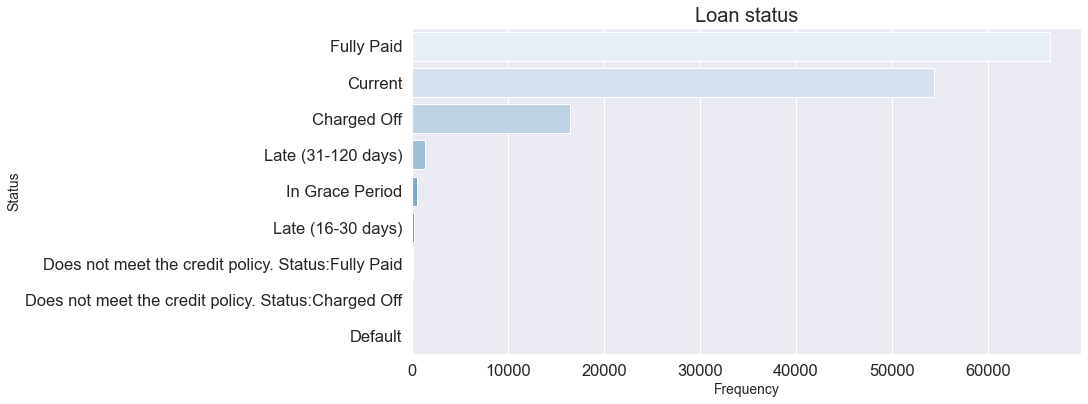

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
ordered_categories = cat['estado'].value_counts().index

# Gráfico de barras con las categorías ordenadas
sns.countplot(data=cat, y='estado', order=ordered_categories, palette='Blues')

# Personalizar el gráfico
plt.title("Loan status", fontsize=20)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Status", fontsize=14)

# Mostrar el gráfico
plt.show()

In [214]:
cat['target_pd']=np.where(cat['estado'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off','Default']),1,0)
cat=cat.drop(columns='estado')

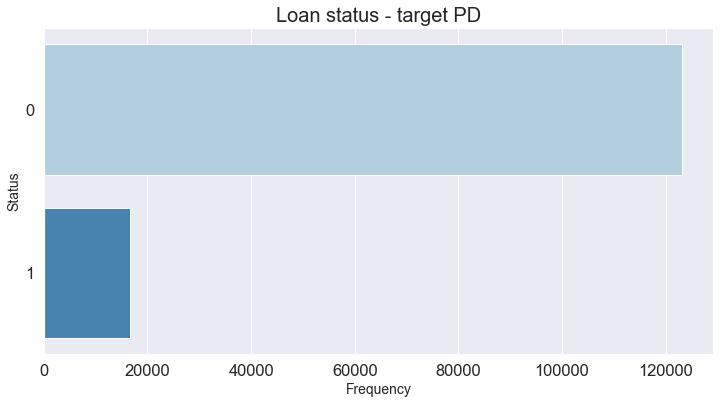

In [217]:
# Opciones generales
plt.figure(figsize=(12, 6))

# Ordenar las categorías de 'empleo' por frecuencia (de más a menos)
ordered_categories = cat['target_pd'].value_counts().index

# Gráfico de barras con las categorías ordenadas
sns.countplot(data=cat, y='target_pd', order=ordered_categories, palette='Blues')

# Personalizar el gráfico
plt.title("Loan status - target PD", fontsize=20)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Status", fontsize=14)

# Mostrar el gráfico
plt.show()

Vamos a analizar el detalle de imp_amortizado e imp_recuperado, ya que son relevantes para la target del modelo LGD.

In [87]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [88]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [89]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139482.0,15016.367524,9163.323034,500.0,8000.000000,12800.00000,20000.0,40000.000000
imp_amortizado,139482.0,9486.001442,8283.467786,0.0,3013.490000,7000.00000,13800.0,40000.000000
imp_recuperado,139482.0,145.848589,767.540977,0.0,0.000000,0.00000,0.0,33407.160000
r_amortizado_principal,139482.0,0.662500,0.369130,0.0,0.274767,0.86915,1.0,1.000032
r_recuperado_principal,139482.0,0.009058,0.041633,0.0,0.000000,0.00000,0.0,1.207635


Conclusiones:

* En transformación convertir num_derogatorios a binaria
* Revisar en profundidad la relación entre estado e imp_recuperado

In [90]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

KeyError: "None of [Index(['estado'], dtype='object')] are in the [columns]"

Efectivamente sólo hay importe recuperado en el estado Charged Off.

## GUARDAR DATASETS TRAS EDA

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [ ]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [ ]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)

In [ ]:
num.num_cancelaciones_12meses.mean()

